In [199]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [200]:
kind = pd.read_csv(r"D:\prisha_manipal_sp\taskmanas\Clustering_Data.csv")
kind

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [201]:
kind.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [202]:
features = [
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Ash_Alcanity",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280",
    "Proline",
    "Customer_Segment"
]

In [203]:
# normalisation using min max scaling ( 0 to 1 scale )

In [204]:
kind = (kind - kind.min())/(kind.max()-kind.min())

In [205]:
kind.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean     0.518584    0.315484    0.538244      0.458502    0.323278   
std      0.213639    0.220780    0.146708      0.172142    0.155244   
min      0.000000    0.000000    0.000000      0.000000    0.000000   
25%      0.350658    0.170455    0.454545      0.340206    0.195652   
50%      0.531579    0.222332    0.534759      0.458763    0.304348   
75%      0.696711    0.462945    0.640374      0.561856    0.402174   
max      1.000000    1.000000    1.000000      1.000000    1.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.000000    0.000000              0.000000         0.000000   
25%         0.262931    0.182489              0.264151         0.264984   
50%         0.474138    0.378692              0.396226         0.361199   
75%         0.627586    0.534810              0.580189         0.485804   
max         1.000000    1.000000              1.000000         1.000000   

       Color_Intensity         Hue       OD280     Proline  Customer_Segment  
count       178.000000  178.000000  178.000000  178.000000        178.000000  
mean          0.322363    0.388170    0.491460    0.334446          0.469101  
std           0.197806    0.185831    0.260070    0.224613          0.387517  
min           0.000000    0.000000    0.000000    0.000000          0.000000  
25%           0.165529    0.245935    0.244505    0.158702          0.000000  
50%           0.290956    0.394309    0.553114    0.282097          0.500000  
75%           0.419795    0.520325    0.695971    0.504280          1.000000  
max           1.000000    1.000000    1.000000    1.000000          1.000000

In [206]:
kind.shape

(178, 14)

In [207]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(kind)
X_pca.shape

(178, 2)

In [208]:
pca.explained_variance_ratio_

array([0.51003634, 0.14853339])

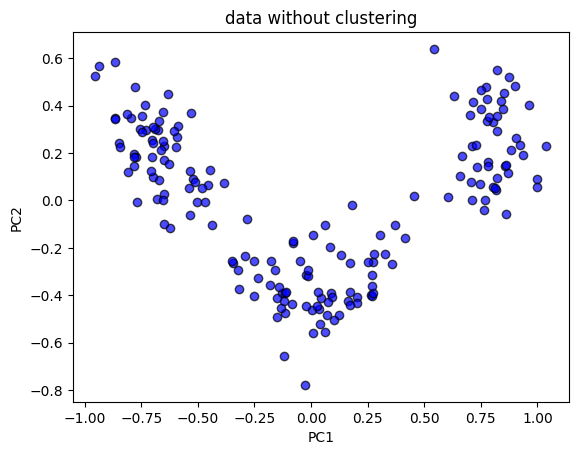

In [209]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolors='k', alpha=0.7)
plt.title("data without clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [210]:
# applying a random centroid

In [211]:
def randomCentroids(data, k):
    random_samples = data.sample(n=k)
    centroids = random_samples.values
    return centroids

In [212]:
centroids = randomCentroids(kind, 3)
centroids

array([[0.35263158, 0.08498024, 0.29946524, 0.46391753, 0.08695652,
        0.38965517, 0.35021097, 0.26415094, 0.19873817, 0.29010239,
        0.5203252 , 0.80952381, 0.16547789, 0.5       ],
       [0.11315789, 0.59288538, 0.2459893 , 0.45876289, 0.40217391,
        0.75862069, 0.47257384, 0.20754717, 1.        , 0.13822526,
        0.2195122 , 0.56410256, 0.20256776, 0.5       ],
       [0.58157895, 0.64031621, 0.4973262 , 0.3556701 , 0.35869565,
        0.57241379, 0.48312236, 0.35849057, 0.39432177, 0.26279863,
        0.27642276, 0.63369963, 0.28673324, 0.        ]])

In [213]:
# assign labels based on nearest centroids

In [214]:
def getLabels(data, centroids):
    # Calculate distances between each point and each centroid
    distances = np.zeros((len(centroids), len(data)))
    for i, centroid in enumerate(centroids):
        distances[i] = np.linalg.norm(data - centroid, axis=1)
    labels = np.argmin(distances, axis=0)
    return labels


In [215]:
# update centroids based on assigned labels


In [216]:
def newCentroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1])) 
    for i in range(k):
        centroids[i] = np.mean(data[labels == i], axis=0)  
    return centroids

In [217]:
# plot clusters

In [218]:
def plotClusters(data, labels, centroids, iteration):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200)
    plt.title(f"Iteration {iteration}")
    plt.show()

In [219]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [220]:
print(X_pca.shape)
print(labels.shape) 

(178, 2)
(2,)


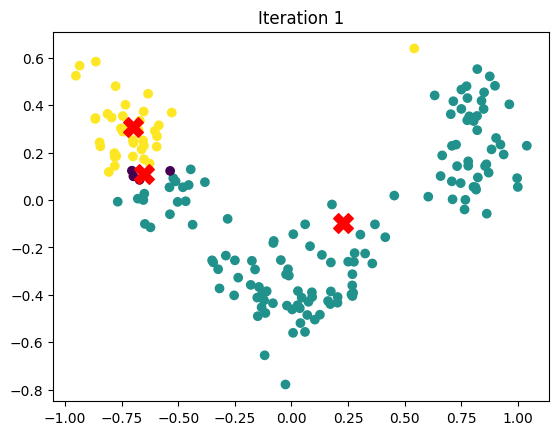

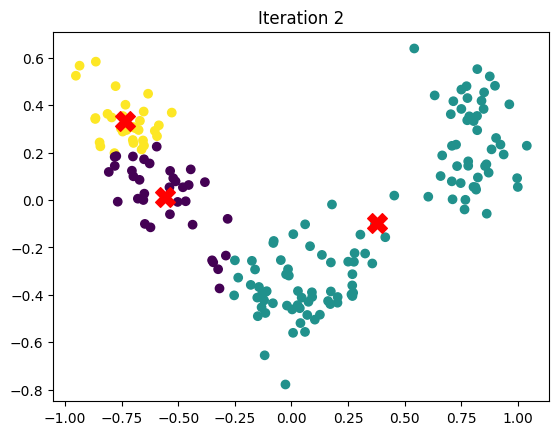

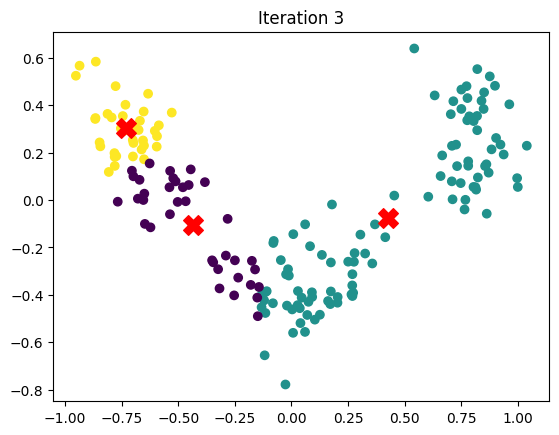

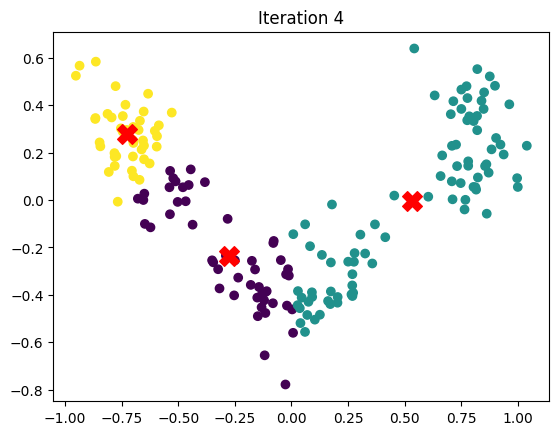

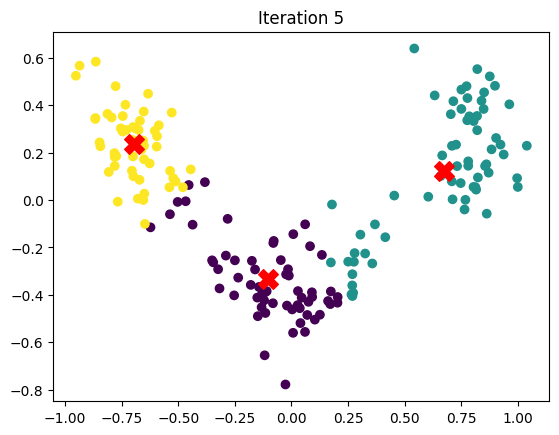

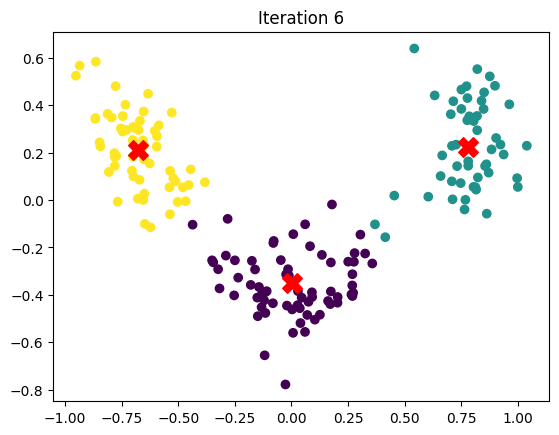

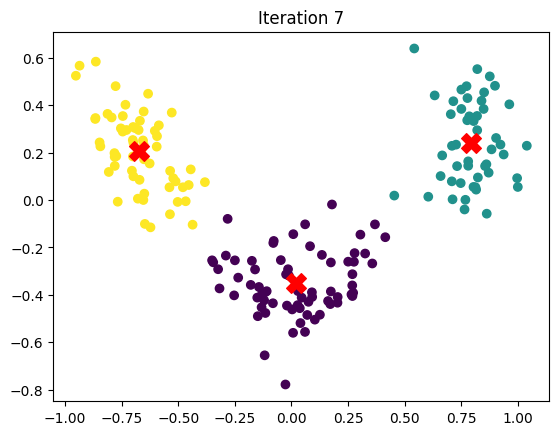

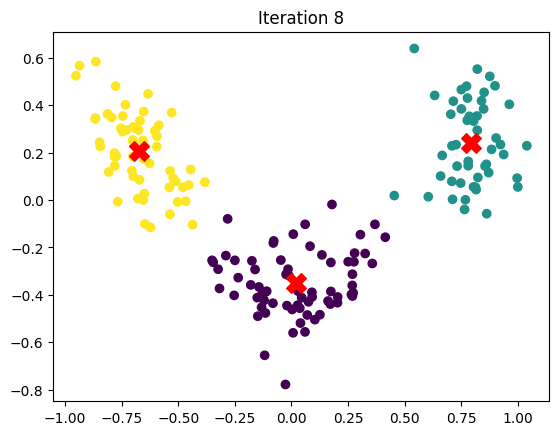

In [221]:
maxIterations = 100
k = 3
centroids = randomCentroids(pd.DataFrame(X_pca), k)  
oldCentroids = np.zeros_like(centroids)
iteration = 1


while iteration < maxIterations and not np.array_equal(centroids, oldCentroids):
    oldCentroids = centroids
    labels = getLabels(X_pca, centroids)  

    centroids = newCentroids(X_pca, labels, k)  
    plotClusters(X_pca, labels, centroids, iteration)  
    iteration += 1